In [18]:
library(TSA)
library(mgcv)
install.packages("nbconvertR")
library(nbconvertR)

Installing package into 'C:/Users/bbalamdari/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'nbconvertR' is in use and will not be installed"

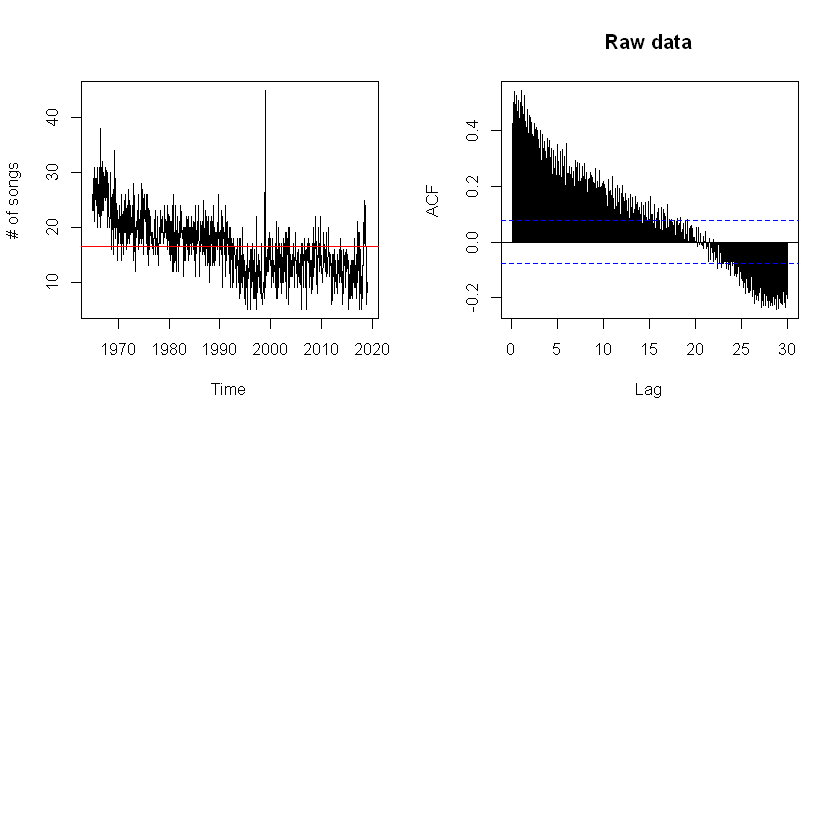

In [19]:
data=read.csv("chart_monthly.csv", header=TRUE)

data=data[,2]
chart = ts(data,start=c(1965,1),freq=12)
par(mfrow=c(2,2))
ts.plot(chart, ylab="# of songs")
avg=mean(chart)
abline(avg, 0, col="red")
acf(chart,lag.max=12*30,main="Raw data")

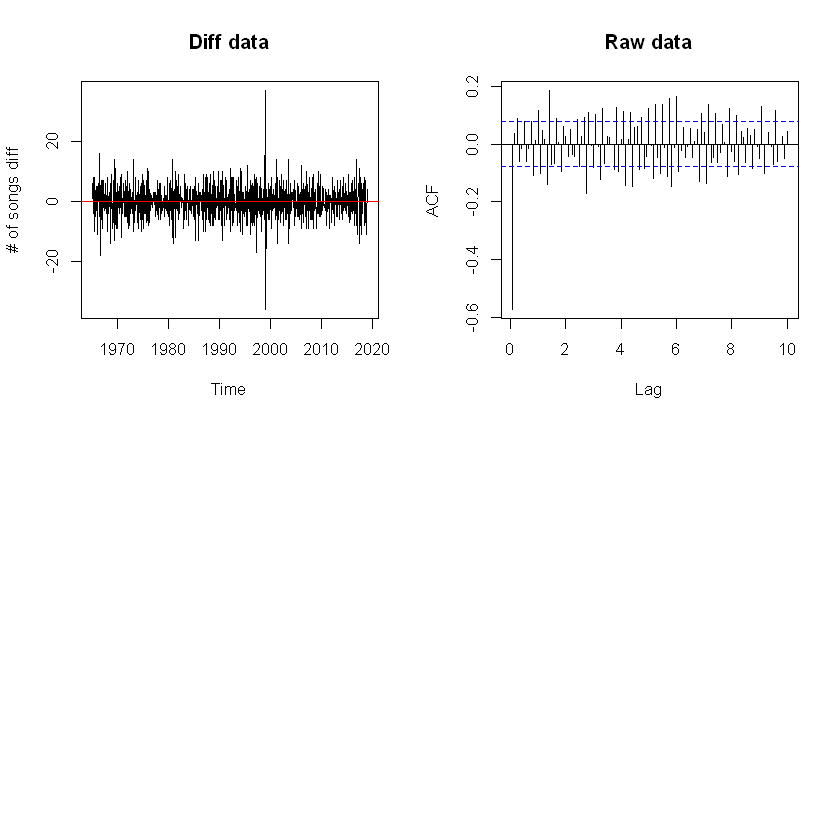

In [20]:
chart.dif = diff(chart)
chart.dif.ts = ts(chart.dif,start=c(1965,2),freq=12)
par(mfrow=c(2,2))
ts.plot(chart.dif.ts, ylab="# of songs diff", main="Diff data")
avg.dif=mean(chart.dif.ts)
abline(avg.dif, 0, col="red")
acf(chart.dif.ts,lag.max=12*10,main="Raw data")


[1] "0 0 0 4089.36281937988"
[1] "0 0 1 4017.33723577697"
[1] "0 0 2 3960.04080339342"
[1] "0 0 3 3895.86480112833"
[1] "0 1 0 4171.28191077876"
[1] "0 1 1 3668.82010032562"
[1] "0 1 2 3646.28341178167"
[1] "0 1 3 3648.24830092855"
[1] "1 0 0 3962.54137338297"
[1] "1 0 1 3678.85678368866"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "1 0 2 3656.16105587233"
[1] "1 0 3 3658.19956394166"
[1] "1 1 0 3915.57181841383"
[1] "1 1 1 3648.18845579501"
[1] "1 1 2 3648.26076371727"
[1] "1 1 3 3649.38001130163"
[1] "2 0 0 3852.30039469936"
[1] "2 0 1 3658.06348316064"


Warning message in log(s2):
"NaNs produced"

[1] "2 0 2 3658.0713266255"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "2 0 3 3659.30944121689"
[1] "2 1 0 3782.35816510705"
[1] "2 1 1 3647.23653552014"
[1] "2 1 2 3648.00232876075"
[1] "2 1 3 3648.57211068919"
[1] "3 0 0 3762.32278184094"
[1] "3 0 1 3657.06181558337"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 0 2 3657.83219096701"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 0 3 3636.73704152299"
[1] "3 1 0 3745.46604670527"
[1] "3 1 1 3647.68656207913"
[1] "3 1 2 3649.53918106813"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 1 3 3612.68797033985"


,p,d,q,AIC
24,2,1,2,3648.002
31,3,1,1,3647.687
23,2,1,1,3647.237
8,0,1,2,3646.283
29,3,0,3,3636.737
33,3,1,3,3612.688


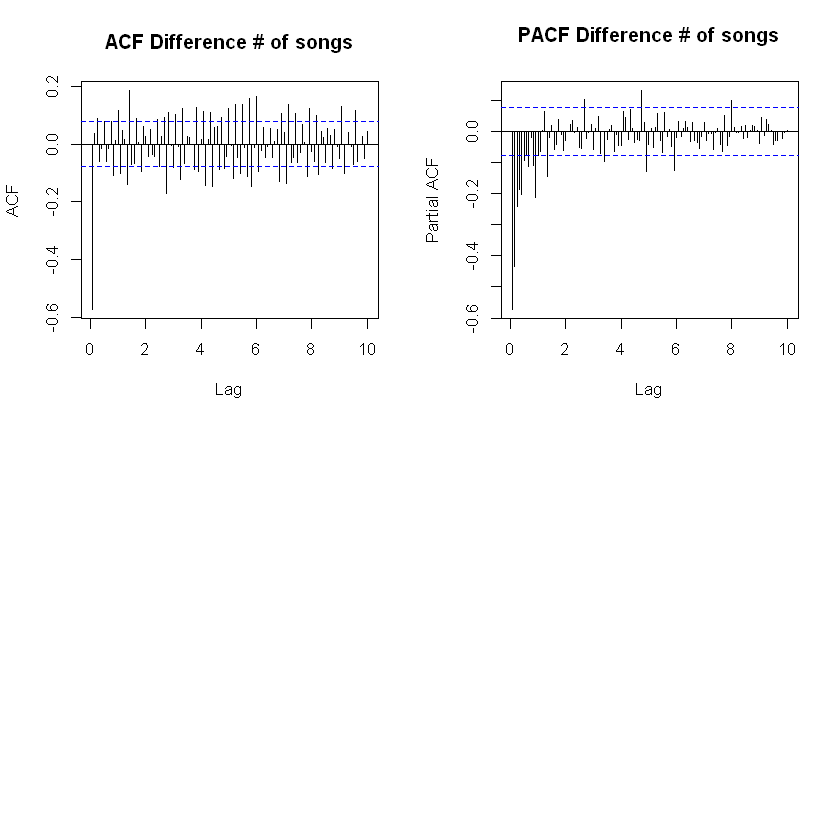

In [21]:
par(mfrow=c(2,2))
acf(chart.dif, lag.max=12*10, main="ACF Difference # of songs")
pacf(chart.dif, lag.max=12*10, main="PACF Difference # of songs")


test_modelA <- function(p,d,q){
  model = arima(chart, order=c(p,d,q), method="ML")
  current.aic = AIC(model)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:3){
  for (d in 0:1){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,test_modelA(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"


	Box-Ljung test

data:  resid(arima_model)
X-squared = 1.6375, df = 1, p-value = 0.2007



	Box-Pierce test

data:  resid(arima_model)
X-squared = 1.623, df = 1, p-value = 0.2027


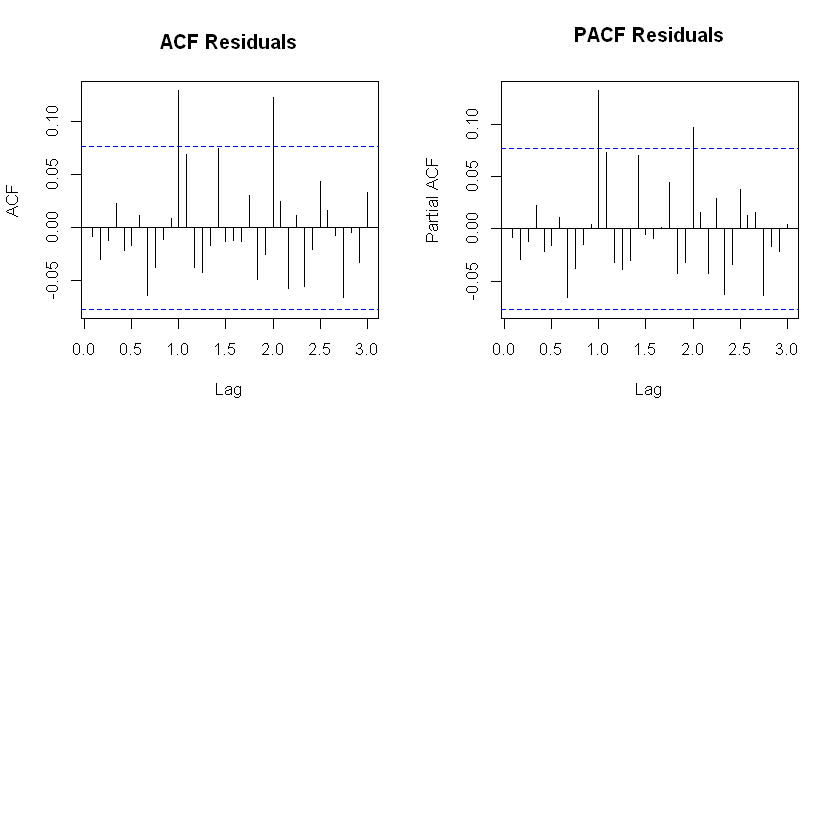

In [22]:
arima_model = arima(chart, order = c(3,1,3), method = "ML")

par(mfrow=c(2,2))
acf(resid(arima_model),lag.max=12*3, main="ACF Residuals")
pacf(resid(arima_model),lag.max=12*3, main="PACF Residuals")

#Sum(order) lags and sum(order)-1 df
Box.test(resid(arima_model), lag = 7, type = "Ljung-Box", fitdf = 6)
Box.test(resid(arima_model), lag = 7, type = "Box-Pierce", fitdf = 6)

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

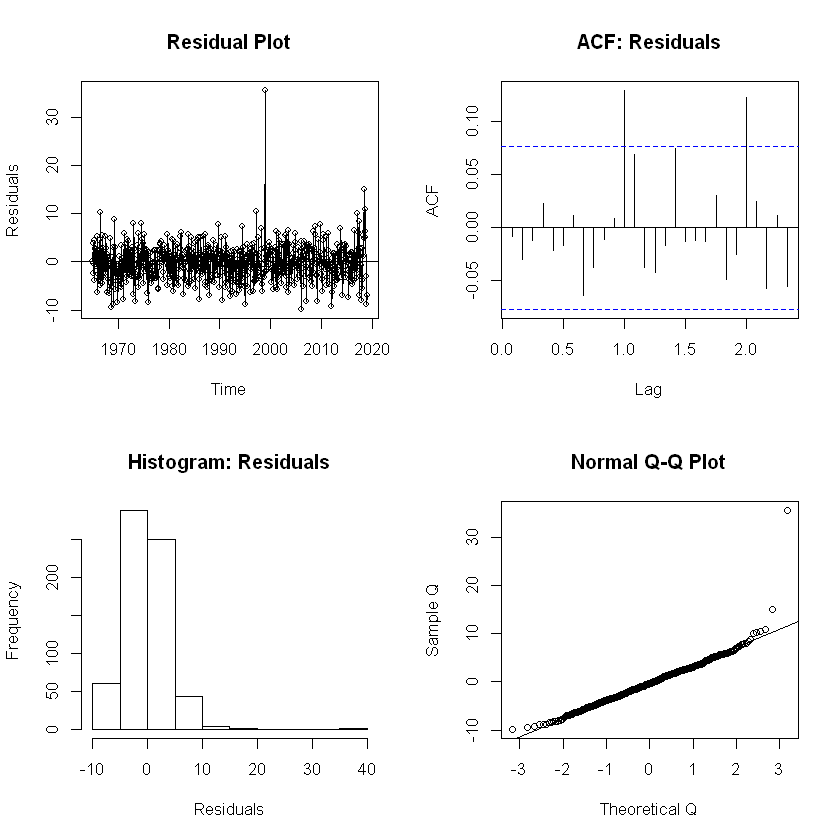

In [23]:
final_model = arima(chart, order = c(3,1,3), method = "ML")
par(mfrow=c(2,2))
plot(resid(final_model), ylab='Residuals',type='o',main="Residual Plot")
abline(h=0)
acf(resid(final_model),main="ACF: Residuals")
hist(resid(final_model),xlab='Residuals',main='Histogram: Residuals')
qqnorm(resid(final_model),ylab="Sample Q",xlab="Theoretical Q")
qqline(resid(final_model))


Call:
arima(x = chart, order = c(2, 1, 4), method = "ML")

Coefficients:
          ar1      ar2     ma1      ma2      ma3     ma4
      -1.1589  -0.9993  0.0912  -0.0963  -0.8896  0.1598
s.e.   0.0017   0.0011  0.0397   0.0186   0.0187  0.0387

sigma^2 estimated as 15.05:  log likelihood = -1799.39,  aic = 3610.78

[1] 1.217197

[1] 6.165023

[1] 49.27662

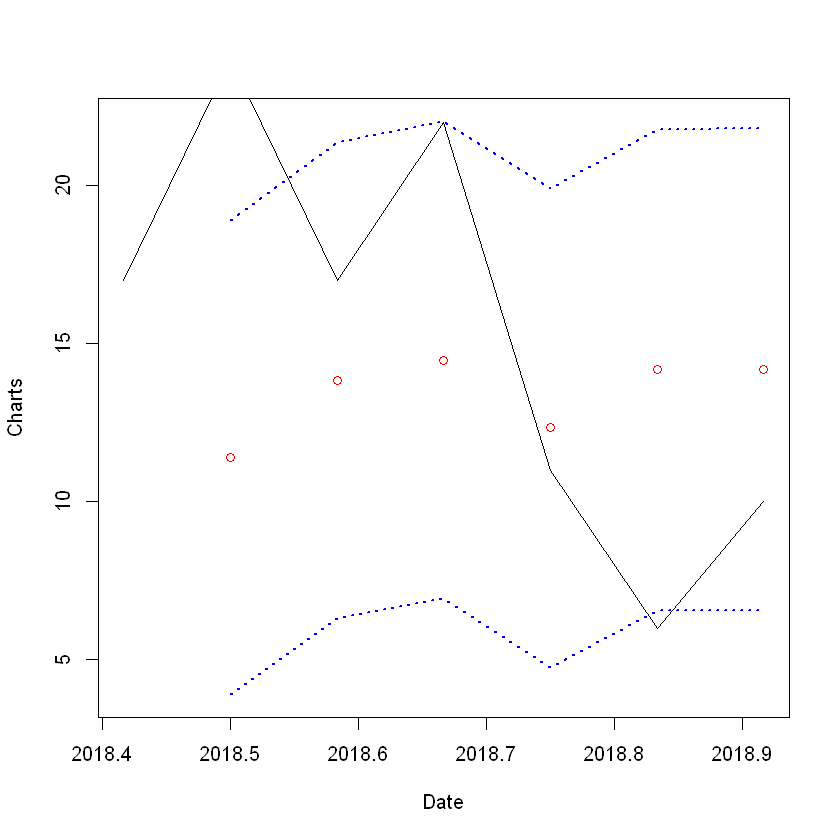

In [24]:
par(mfrow=c(1,1))
arima.model = arima(chart, order = c(2,1,4),method = "ML")
arima.model

time = time(chart)
n = length(chart)
nfit = n - 6

chart.train = arima(chart[1:nfit], order = c(2,1,4),method = "ML")
arima.pred = as.vector(predict(chart.train,n.ahead=6))
date=time(chart)
ubound = arima.pred$pred+1.96*arima.pred$se
lbound = arima.pred$pred-1.96*arima.pred$se
ymin = min(lbound)
ymax = max(ubound)

plot(date[nfit:n],chart[nfit:n],type="l", ylim=c(ymin,ymax), xlab="Date", ylab = 'Charts', main="")
points(date[(nfit+1):n],arima.pred$pred,col="red")
lines(date[(nfit+1):n],ubound,lty=3,lwd= 2, col="blue")
lines(date[(nfit+1):n],lbound,lty=3,lwd= 2, col="blue")

predicts = arima.pred$pred
obs = chart[(nfit+1):n]

#Precision
sum((predicts-obs)^2)/sum((obs-mean(obs))^2)

#MAPE
mean(abs(predicts-obs))

#MAPM
100*mean(abs(predicts-obs)/obs)



In [25]:
#Q2
library(TSA)
library(mgcv)

[1] "0 0 0 -569.420853737233"
[1] "0 0 1 -917.96944823913"
[1] "0 0 2 -1172.6587921307"
[1] "0 0 3 -1355.38382999252"
[1] "0 1 0 -1784.85289053596"
[1] "0 1 1 -1788.70792253433"
[1] "0 1 2 -1786.81923292415"
[1] "0 1 3 -1786.2763563839"
[1] "0 2 0 -1622.2281778826"
[1] "0 2 1 -1774.06048060326"
[1] "0 2 2 -1776.50757797604"
[1] "0 2 3 -1774.92343242775"
[1] "1 0 0 -1782.87765219633"
[1] "1 0 1 -1786.9209325297"
[1] "1 0 3 -1787.57530522108"
[1] "1 1 0 -1788.22872834945"
[1] "1 1 1 -1786.76302116555"
[1] "1 1 2 -1784.94794222003"
[1] "1 1 3 -1784.58680040639"
[1] "1 2 0 -1669.12059628723"
[1] "1 2 1 -1775.97062237718"
[1] "1 2 2 -1774.67378361803"
[1] "1 2 3 -1773.29602315847"
[1] "2 0 0 -1786.46590074303"
[1] "2 0 1 -1784.96352204584"
[1] "2 0 2 -1777.91857859351"
[1] "2 0 3 -1778.62799788012"
[1] "2 1 0 -1787.2439073141"
[1] "2 1 1 -1785.32555812172"


Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"

[1] "2 1 2 -1798.00812009217"
[1] "2 1 3 -1796.10009655366"
[1] "2 2 0 -1694.18164076294"
[1] "2 2 1 -1775.66283349742"
[1] "2 2 2 -1773.98221705146"
[1] "2 2 3 -1786.40928836845"
[1] "3 0 0 -1563.88834033217"


Warning message in log(s2):
"NaNs produced"Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 0 1 -1782.5750536717"
[1] "3 0 2 -1787.5725787374"
[1] "3 0 3 -1783.95581959344"
[1] "3 1 0 -1785.65739143975"
[1] "3 1 1 -1784.37651984035"
[1] "3 1 2 -1796.09876463304"
[1] "3 1 3 -1796.76093324888"
[1] "3 2 0 -1727.84285689718"
[1] "3 2 1 -1774.92023445478"
[1] "3 2 2 -1773.53700767872"
[1] "3 2 3 -1784.41245565282"


,p,d,q,AIC
17,1,1,0,-1788.229
7,0,1,1,-1788.708
43,3,1,2,-1796.099
32,2,1,3,-1796.100
44,3,1,3,-1796.761
31,2,1,2,-1798.008


Warning message in log(s2):
"NaNs produced"Warning message in log(s2):
"NaNs produced"


	Box-Ljung test

data:  resid(EU.ARIMA)
X-squared = 1.4511, df = 1, p-value = 0.2284



	Box-Pierce test

data:  resid(EU.ARIMA)
X-squared = 1.4178, df = 1, p-value = 0.2338


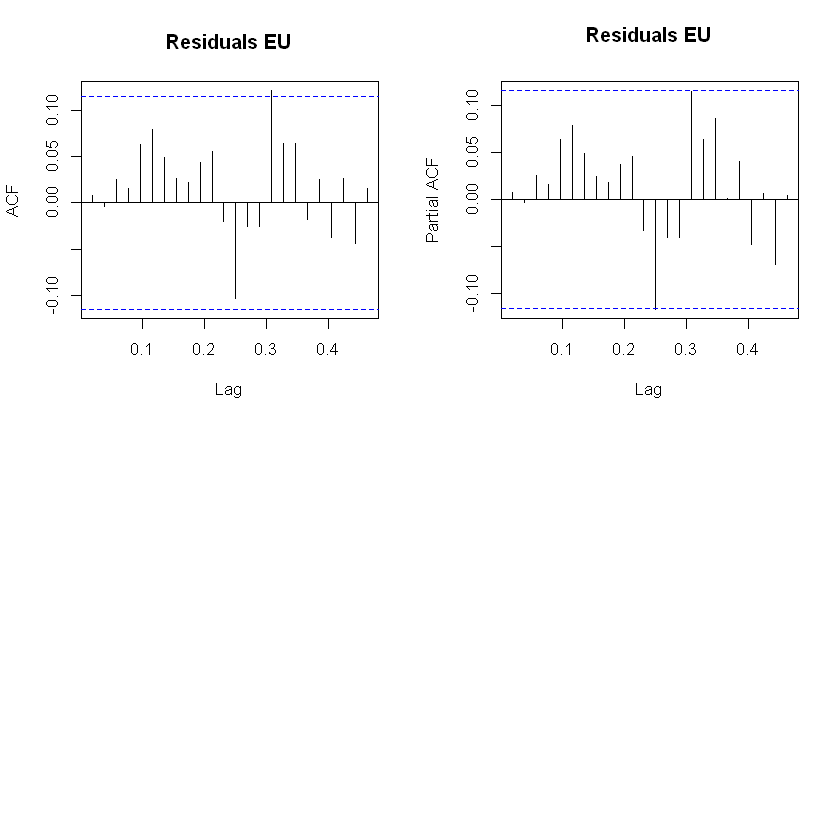

In [26]:
data1=read.csv("USD to EU.csv", header=TRUE)
data2=read.csv("USD to GBP.csv", header=TRUE)


EU = ts(data1[,2],start=c(2014),freq=52)
GBP = ts(data2[,2],start=c(2014),freq=52)


#EU
model.EU <- function(p,d,q){
  model.EU = arima(EU, order=c(p,d,q), method="ML")
  current.aic = AIC(model.EU)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:3){
  for (d in 0:2){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,model.EU(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)

EU.ARIMA= arima(EU, order = c(2,1,2), method = "ML")
par(mfrow=c(2,2))
acf(resid(EU.ARIMA),main="Residuals EU")
pacf(resid(EU.ARIMA),main="Residuals EU")

Box.test(resid(EU.ARIMA), lag = 5, type = "Ljung-Box", fitdf = 4)
Box.test(resid(EU.ARIMA), lag = 5, type = "Box-Pierce", fitdf = 4)


[1] "0 0 0 -294.663964544953"
[1] "0 0 1 -658.997635234656"
[1] "0 0 2 -939.93637221479"
[1] "0 0 3 -1111.9437578204"
[1] "0 1 0 -1619.85724248392"
[1] "0 1 1 -1631.80095201227"
[1] "0 1 2 -1631.01849313932"
[1] "0 1 3 -1630.5328745831"
[1] "0 2 0 -1476.94141423421"
[1] "0 2 1 -1608.08134365204"
[1] "0 2 2 -1619.63606514124"
[1] "0 2 3 -1618.99324224149"
[1] "1 0 0 -1616.91059171626"
[1] "1 0 1 -1629.12875104219"
[1] "1 0 2 -1628.21555956067"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "1 0 3 -1625.63262136571"
[1] "1 1 0 -1628.84298543242"
[1] "1 1 1 -1630.53419488331"
[1] "1 1 2 -1629.50656422264"
[1] "1 1 3 -1630.33815100634"
[1] "1 2 0 -1506.16260567687"
[1] "1 2 1 -1616.66370172833"
[1] "1 2 2 -1618.43209376104"
[1] "1 2 3 -1617.61293638911"
[1] "2 0 0 -1626.1834760353"
[1] "2 0 1 -1627.79422177125"
[1] "2 0 2 -1630.63355495433"
[1] "2 0 3 -1627.18110711778"
[1] "2 1 0 -1632.05834298463"
[1] "2 1 1 -1630.10642870094"
[1] "2 1 2 -1629.96320704008"
[1] "2 1 3 -1628.65142267026"
[1] "2 2 0 -1542.94155486753"
[1] "2 2 1 -1620.15552258965"
[1] "2 2 2 -1618.18511913838"
[1] "2 2 3 -1617.95135954089"
[1] "3 0 0 -1384.15973591385"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 0 1 -1627.07281057153"
[1] "3 0 3 -1627.16889030955"
[1] "3 1 0 -1630.14796800234"
[1] "3 1 1 -1628.22885259749"
[1] "3 1 2 -1629.68453363093"


Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
"possible convergence problem: optim gave code = 1"

[1] "3 1 3 -1628.13912819276"
[1] "3 2 0 -1565.58861773793"
[1] "3 2 1 -1618.20782428416"
[1] "3 2 2 -1616.78165255329"
[1] "3 2 3 -1616.67402014137"


,p,d,q,AIC
9,0,1,3,-1630.533
19,1,1,1,-1630.534
28,2,0,2,-1630.634
8,0,1,2,-1631.018
7,0,1,1,-1631.801
30,2,1,0,-1632.058



	Box-Ljung test

data:  resid(GBP.ARIMA)
X-squared = 0.06163, df = 1, p-value = 0.8039



	Box-Pierce test

data:  resid(GBP.ARIMA)
X-squared = 0.060639, df = 1, p-value = 0.8055


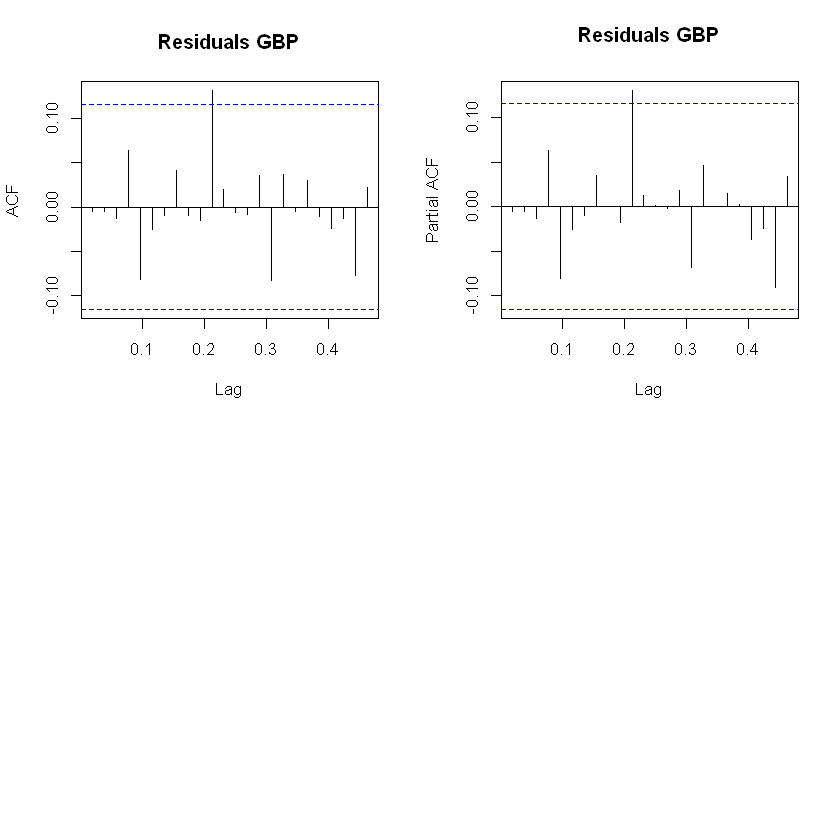

In [27]:
#GBP
model.GBP <- function(p,d,q){
  model.GBP = arima(GBP, order=c(p,d,q), method="ML")
  current.aic = AIC(model.GBP)
  df = data.frame(p,d,q,current.aic)
  names(df) <- c("p","d","q","AIC")
  print(paste(p,d,q,current.aic,sep=" "))
  return(df)
}

orders = data.frame(Inf,Inf,Inf,Inf)
names(orders) <- c("p","d","q","AIC")


for (p in 0:3){
  for (d in 0:2){
    for (q in 0:3) {
      possibleError <- tryCatch(
        orders<-rbind(orders,model.GBP(p,d,q)),
        error=function(e) e
      )
      if(inherits(possibleError, "error")) next
      
    }
  }
}
orders <- orders[order(-orders$AIC),]
tail(orders)

GBP.ARIMA= arima(GBP, order = c(2,1,0), method = "ML")
par(mfrow=c(2,2))
acf(resid(GBP.ARIMA),main="Residuals GBP")
pacf(resid(GBP.ARIMA),main="Residuals GBP")

Box.test(resid(GBP.ARIMA), lag = 3, type = "Ljung-Box", fitdf = 2)
Box.test(resid(GBP.ARIMA), lag = 3, type = "Box-Pierce", fitdf = 2)

In [28]:
EU.ARIMA
GBP.ARIMA


Call:
arima(x = EU, order = c(2, 1, 2), method = "ML")

Coefficients:
          ar1      ar2     ma1     ma2
      -0.4504  -0.8491  0.5958  0.9286
s.e.   0.0798   0.0582  0.0614  0.0573

sigma^2 estimated as 0.0001072:  log likelihood = 904,  aic = -1800.01


Call:
arima(x = GBP, order = c(2, 1, 0), method = "ML")

Coefficients:
         ar1      ar2
      0.2199  -0.1340
s.e.  0.0585   0.0584

sigma^2 estimated as 0.0001944:  log likelihood = 819.03,  aic = -1634.06

[1] 0.006380014

[1] 1.616308

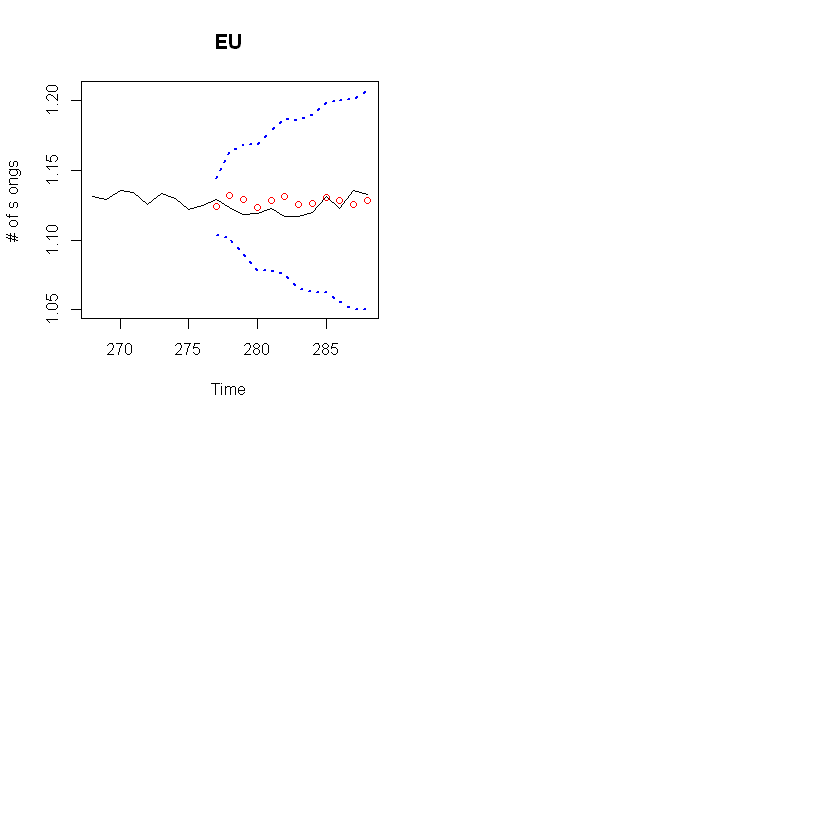

In [31]:
n = length(EU) 
nfit = n-12 
porder=2 
qorder=2 
modfit = arima(EU[1:nfit], order = c(porder,1,qorder),method = "ML") 
modpred = predict(modfit,n.ahead=12) 
 
ubound = modpred$pred+1.96*modpred$se 

lbound = modpred$pred-1.96*modpred$se 
ymin = min(lbound) 
ymax = max(ubound) 
k=seq(nfit+1, n, 1) 
k1=seq(n-20, n, 1)
par(mfrow=c(2,2))
plot(k1, EU[(n-20):n], type="l", ylim=c(ymin,ymax), xlab="Time", ylab="# of s ongs", main="EU") 
points(k,modpred$pred,col="red") 
lines(k, ubound,lty=3,lwd= 2, col="blue")
lines(k, lbound,lty=3,lwd= 2, col="blue") 
 
obs=EU[(n-12+1):n] 
predict=modpred$pred 
MAPE=mean(abs(predict-obs)/obs) 
PM=sum((predict-obs)^2)/sum((obs-mean(obs))^2) 
MAPE
PM


[1] 0.01940747

[1] 2.999088

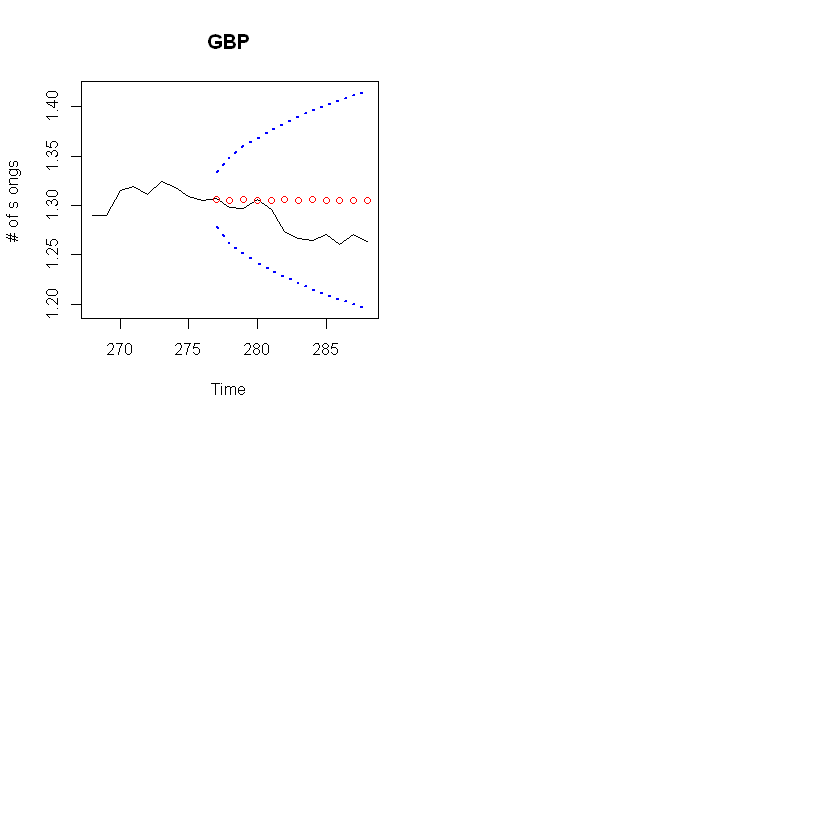

In [32]:
n = length(GBP) 
nfit = n-12 
porder=2 
qoredr=0 
modfit = arima(GBP[1:nfit], order = c(porder,1,qorder),method = "ML") 
modpred = predict(modfit,n.ahead=12) 
 
ubound = modpred$pred+1.96*modpred$se 

lbound = modpred$pred-1.96*modpred$se 
ymin = min(lbound) 
ymax = max(ubound) 
k=seq(nfit+1, n, 1) 
k1=seq(n-20, n, 1)
par(mfrow=c(2,2))
plot(k1, GBP[(n-20):n], type="l", ylim=c(ymin,ymax), xlab="Time", ylab="# of s ongs", main="GBP") 
points(k,modpred$pred,col="red") 
lines(k, ubound,lty=3,lwd= 2, col="blue")
lines(k, lbound,lty=3,lwd= 2, col="blue") 
 
obs=GBP[(n-12+1):n] 
predict=modpred$pred 
MAPE=mean(abs(predict-obs)/obs) 
PM=sum((predict-obs)^2)/sum((obs-mean(obs))^2) 
MAPE
PM